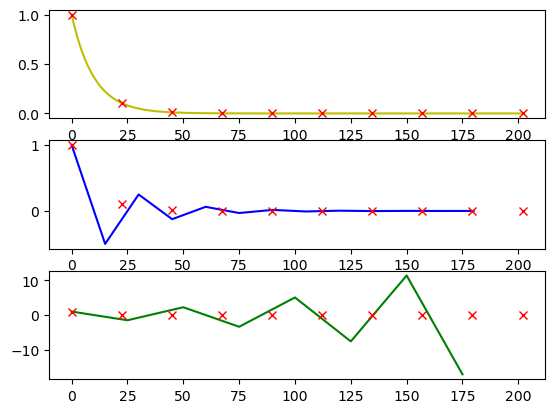

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#forward
def funcforward(y0, dt, lamb, xmax):
    n = int(xmax/dt)
    y = [0]*n
    y[0] = y0
    for i in range(1,n):
        y[i] = y[i-1]*(1-dt*lamb)
    x = list(i*dt for i in range(0,n))
    return x, y
ystart = 1
xmax = 202
lamb = 0.1
x0,y0 = funcforward(ystart, 0.1, lamb, xmax)
x1,y1 = funcforward(ystart, 15, lamb, xmax)
x2,y2 = funcforward(ystart, 25, lamb, xmax)

def realdata(x, y, lamb):
    x1 = np.linspace(x[0], max(x), 10)
    y1 = y[0]*np.exp(-x1*lamb)
    return x1, y1
x01, y01 = realdata(x0, y0, 0.1);

fig, axs = plt.subplots(3, 1)
axs[0].plot(x0,y0, "-y", x01, y01, "xr")
axs[1].plot(x1,y1, "-b", x01, y01, "xr")
axs[2].plot(x2,y2, "-g", x01, y01, "xr")
plt.show()

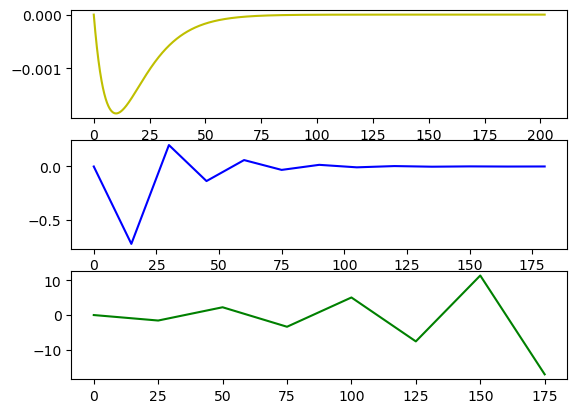

In [8]:
def erfuncforward(x, y, lamb):
    n = len(x)
    er = x.copy()
    for i in range(0,n):
        er[i] = y[i] - y[0]*np.exp(-x[i]*lamb)
    return er
er0 = erfuncforward(x0, y0, 0.1)
er1 = erfuncforward(x1, y1, 0.1)
er2 = erfuncforward(x2, y2, 0.1)

fig, ax = plt.subplots(3, 1)
ax[0].plot(x0, er0, 'y')
ax[1].plot(x1, er1, 'b')
ax[2].plot(x2, er2, 'g')

plt.show()

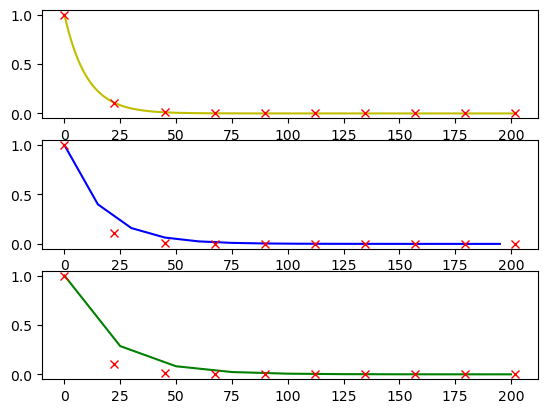

In [9]:
# backward

import matplotlib.pyplot as plt
import numpy as np
import math

#forward
def funcbackward(y0, dt, lamb, xmax):
    n = math.ceil(xmax/dt)
    y = [0]*n
    y[0] = y0
    for i in range(1,n):
        y[i] = y[i-1]/(1+dt*lamb)
    x = list(i*dt for i in range(0,n))
    return x, y
ystart = 1
xmax = 202
lamb = 0.1
x0,y0 = funcbackward(ystart, 0.1, lamb, xmax)
x1,y1 = funcbackward(ystart, 15, lamb, xmax)
x2,y2 = funcbackward(ystart, 25, lamb, xmax)

def realdata(x, y, lamb):
    x1 = np.linspace(x[0], max(x), 10)
    y1 = y[0]*np.exp(-x1*lamb)
    return x1, y1
x01, y01 = realdata(x0, y0, 0.1);

fig, axs = plt.subplots(3, 1)
axs[0].plot(x0,y0, "-y", x01, y01, "xr")
axs[1].plot(x1,y1, "-b", x01, y01, "xr")
axs[2].plot(x2,y2, "-g", x01, y01, "xr")
plt.show()

The formula:
$$y^n = {y^{n-1}\over(1+\Delta t\lambda)}$$
Therefore
$$A = {1\over(1+\Delta t \lambda)}$$
Because A is always less than 1, the backward in time difference scheme in $(y^n-y^{n+1})/\Delta t = -\lambda y^n$ is always stable for the differential equation in $dy/dt=\lambda y$

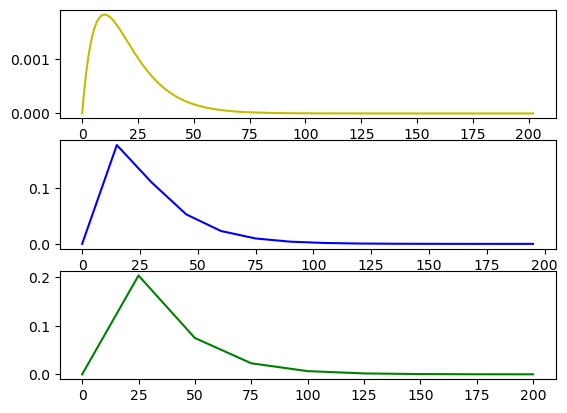

In [4]:
def erfuncbackward(x, y, lamb):
    n = len(x)
    er = x.copy()
    for i in range(0,n):
        er[i] = y[i] - y[0]*np.exp(-x[i]*lamb)
    return er
er0 = erfuncbackward(x0, y0, 0.1)
er1 = erfuncbackward(x1, y1, 0.1)
er2 = erfuncbackward(x2, y2, 0.1)

fig, ax = plt.subplots(3, 1)
ax[0].plot(x0, er0, 'y')
ax[1].plot(x1, er1, 'b')
ax[2].plot(x2, er2, 'g')

plt.show()